#import

In [651]:
import numpy as np # numpy.py 안에 있는 함수를 이용
import pandas as pd 
import matplotlib.pyplot as plt # matplotlib - pyplot.py 안에 있는 함수를 이용
import seaborn as sns

#Movielens데이터 셋
* https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/movielens
* movies.dat: MovieID::Title::Genres 을 컬럼으로 하는 데이터 셋. 영화 정보
* ratings.dat : UserID::MovieID::Rating::Timestamp 을 컬럼으로 하는 데이터 셋. 영화 평점 (MovieID = foreign key)
* users.dat : UserID::Gender::Age::Occupation::Zip-code 을 컬럼으로 하는 데이터 셋. 사용자 정보

# Movies.dat

In [ ]:
# movies.dat 파일이 저장된 경로
file_path = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/movies.dat'

movies = pd.read_csv(file_path, sep='::', names=['movieId', 'title', 'genres'], engine='python')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.tail()

,movieId,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


## 연습문제

In [ ]:
# 1. Animation이 포함된 영화들?
animations = movies[movies.genres.str.contains('Animation')]

In [ ]:
animations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 3875
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  105 non-null    int64 
 1   title    105 non-null    object
 2   genres   105 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [ ]:
# 2. romantic & comedy가 포함된 영화들?
roco = movies[movies.genres.str.contains('Romance') &
              movies.genres.str.contains('Comedy')]

In [ ]:
len(roco)

204

In [ ]:
# 3. 장르 분석

genres=[]

for s in movies.genres:
    genre = s.split(sep='|')
    genres.extend(genre) # extend = 원소들을 2차원 배열이 아닌, 1차열 배열로 만들어줌

print(genres)

['Animation', "Children's", 'Comedy', 'Adventure', "Children's", 'Fantasy', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Action', 'Crime', 'Thriller', 'Comedy', 'Romance', 'Adventure', "Children's", 'Action', 'Action', 'Adventure', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Comedy', 'Horror', 'Animation', "Children's", 'Drama', 'Action', 'Adventure', 'Romance', 'Drama', 'Thriller', 'Drama', 'Romance', 'Thriller', 'Comedy', 'Action', 'Action', 'Comedy', 'Drama', 'Crime', 'Drama', 'Thriller', 'Thriller', 'Drama', 'Sci-Fi', 'Drama', 'Romance', 'Drama', 'Drama', 'Romance', 'Adventure', 'Sci-Fi', 'Drama', 'Drama', 'Drama', 'Sci-Fi', 'Adventure', 'Romance', "Children's", 'Comedy', 'Drama', 'Drama', 'Romance', 'Drama', 'Documentary', 'Comedy', 'Comedy', 'Romance', 'Drama', 'Drama', 'War', 'Action', 'Crime', 'Drama', 'Drama', 'Action', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Romance', 'Crime', 'Thriller', 'Animation', "Children's", 'Musical', 'Romance', 'Drama', 'Romance', 'Crime', 'Th

In [ ]:
genre_counts = pd.value_counts(genres)

print(genre_counts)

genre_counts.values

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64


array([1603, 1200,  503,  492,  471,  343,  283,  276,  251,  211,  143,
        127,  114,  106,  105,   68,   68,   44])

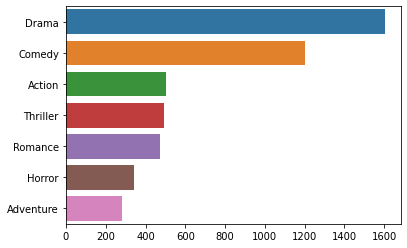

In [ ]:
g_top7 = genre_counts.head(7) # 상위 7개 == .iloc[:7]

sns.barplot(y = g_top7.index, x= g_top7.values)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


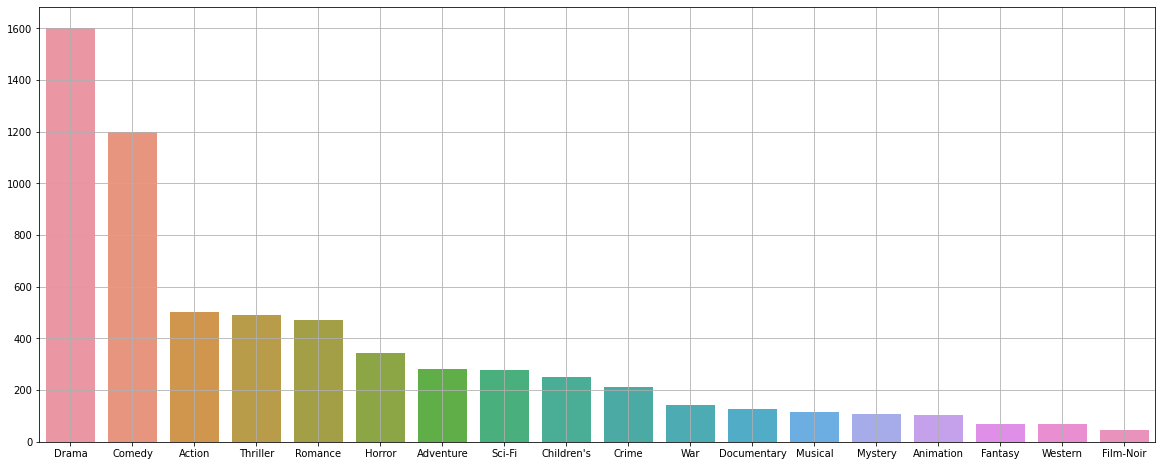

In [ ]:
fig = plt.figure(figsize=(20,8))

sns.barplot(genre_counts.index,genre_counts.values)

plt.grid()
plt.show()

## 장르별 영화 개수 분석

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
movies['year'] = movies.title.str[-5:-1].astype('int') 
# str : [데이터의 모든 원소들을 반복하며] 문자열 컬럼의 [-5:-1] 까지 잘라내기
#astype = 타입 추가

In [ ]:
year_count = movies.year.value_counts()

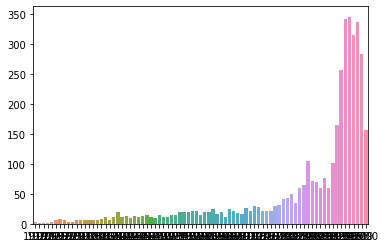

In [ ]:
sns.barplot(x = year_count.index, y = year_count.values)

# plt.xticks(ticks=[10,20,30,40])

plt.show()

<BarContainer object of 81 artists>

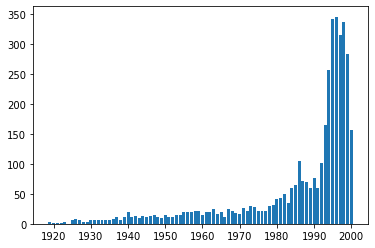

In [ ]:
plt.bar(x=year_count.index, height = year_count.values)

# DataFrame 합치기 - merge()

* 같은 이름의 column을 가진 2개의 데이터를 join할 때 사용

In [ ]:
# .dat 파일이 저장된 경로
movies_file = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/movies.dat'
ratings_file = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/ratings.dat'
users_file = 'https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/users.dat'

In [ ]:
# 데이터 프레임의 컬럼 이름 정의
movies_colnames = ['movie_id', 'title', 'genres']
ratings_colnames = ['user_id', 'movie_id', 'rating', 'timestamp']
users_colnames = ['user_id', 'gender', 'age', 'occupation', 'zipcode']

In [ ]:
movies = pd.read_csv(movies_file, sep='::', engine = 'python', names=movies_colnames)
ratings = pd.read_csv(ratings_file, sep='::', engine = 'python', names=ratings_colnames)
users = pd.read_csv(users_file, sep='::', engine = 'python', names=users_colnames)

In [ ]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
users.head()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


## rating + movies (join)

* pd.merge(left_data, right_data)
* merge()함수 : SQL JOIN 문
* param how = join 방식. inner, left, right, outer
* param on = join을 할 때 사용할 컬럼(들)의 이름.
    * 공통되는 column 이름은 없지만, primary key - foreign key의 관계가 있으면 설정함.

In [ ]:
df = pd.merge(ratings, movies)

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1000209 non-null  int64 
 1   movie_id   1000209 non-null  int64 
 2   rating     1000209 non-null  int64 
 3   timestamp  1000209 non-null  int64 
 4   title      1000209 non-null  object
 5   genres     1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


## df + users (join)

In [ ]:
df = pd.merge(df, users)

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zipcode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   title       1000209 non-null  object
 5   genres      1000209 non-null  object
 6   gender      1000209 non-null  object
 7   age         1000209 non-null  int64 
 8   occupation  1000209 non-null  int64 
 9   zipcode     1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


# 영화 별점 분석

In [ ]:
df.rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

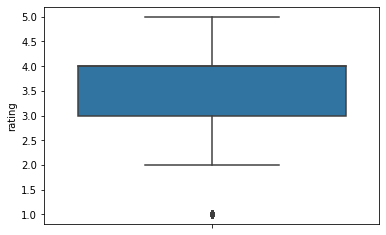

In [ ]:
sns.boxplot(data = df, y=df.rating)
plt.show()

## 별점 빈도수 : count plot

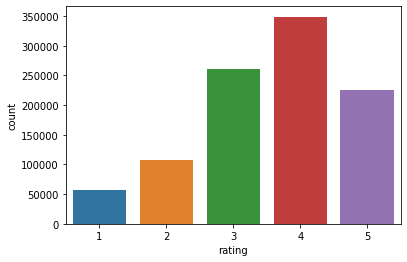

In [ ]:
sns.countplot(data = df , x = df.rating)
plt.show()

In [ ]:
rating_count = df.rating.value_counts()

rating_count

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

## 성별에 따른 분석

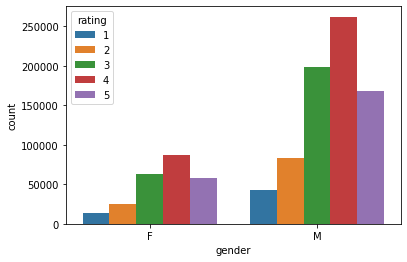

In [ ]:
# 영화 별점을 남긴 사용자들의 성비
sns.countplot(data = df, x = df.gender, hue = df.rating)

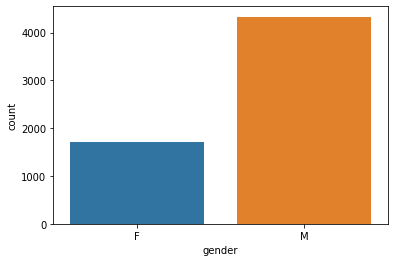

In [ ]:
# users 데이터프레임의 성비
sns.countplot(data = users, x = users.gender)

## 연령대 분석

In [ ]:
df.age.value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: age, dtype: int64

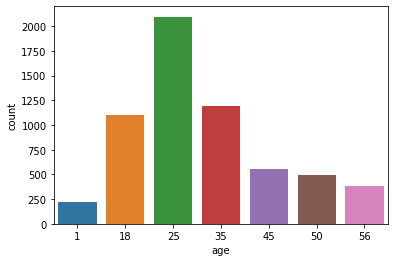

In [ ]:
sns.countplot(data = df, x = users.age)
plt.show()

# 직업군 분석

* 가장 별점을 많이 남긴 직업군 5개의 이름

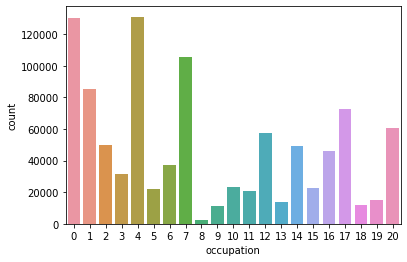

In [ ]:
occus = df.occupation.value_counts().iloc[:5]

sns.countplot(data = df, x= 'occupation')

# 영화 별점 평균 상위/하위 10개의 영화 제목

In [ ]:
# 영화 제목별 별점 평균

movie_rank = df.groupby('title').rating.mean()
movie_rank # Series(index, values)

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [ ]:
# 평점 순위로 정렬
movie_rank.sort_values(ascending=False) # default = assending=True(내림차순)

# 상위 10개의 영화
best10 = movie_rank.sort_values(ascending=False).head(10)

# 상위 10개 영화의 이름
best10.index

Index(['Ulysses (Ulisse) (1954)', 'Lured (1947)', 'Follow the Bitch (1998)',
       'Bittersweet Motel (2000)', 'Song of Freedom (1936)',
       'One Little Indian (1973)', 'Smashing Time (1967)',
       'Schlafes Bruder (Brother of Sleep) (1995)',
       'Gate of Heavenly Peace, The (1995)', 'Baby, The (1973)'],
      dtype='object', name='title')

In [ ]:
# 하위 10개의 영화
worst10 = movie_rank.sort_values().head(10)

# 하위 10개 영화의 이름
worst10.index

Index(['Elstree Calling (1930)', 'Get Over It (1996)', 'Venice/Venice (1992)',
       'Windows (1980)', 'Kestrel's Eye (Falkens öga) (1998)',
       'McCullochs, The (1975)', 'Sleepover (1995)',
       'Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)',
       'Spring Fever USA (a.k.a. Lauderdale) (1989)',
       'Santa with Muscles (1996)'],
      dtype='object', name='title')

## 별점의 개수가 1~2개 밖에 없는 영화들의 별점 평균은 큰 의미가 없을 것 같음.
* 일정 개수 이상의 별점 건수가 있는 영화들을 선택해서 별점 평균 분석을 하는 것이 더 의미가 있을 것 같음.

In [ ]:
# 영화 제목별 별점 개수
title_counts = df.title.value_counts()

title_counts.head(10)

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: title, dtype: int64

In [ ]:
title_counts.describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: title, dtype: float64

## 150건 이상의 별점을 받은 영화들에 대해서 분석

In [ ]:
# 150건 이상의 별점을 받은 영화들 목록
indexer = title_counts[title_counts>=150].index

In [ ]:
# 150건 이상의 별점 리뷰가 있는 영화들의 별점 평균
movie_rank_150 = movie_rank.loc[indexer]
movie_rank_150

American Beauty (1999)                                     4.317386
Star Wars: Episode IV - A New Hope (1977)                  4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)      4.292977
Star Wars: Episode VI - Return of the Jedi (1983)          4.022893
Jurassic Park (1993)                                       3.763847
                                                             ...   
Asphalt Jungle, The (1950)                                 3.927152
Tales from the Crypt Presents: Bordello of Blood (1996)    2.589404
Golden Voyage of Sinbad, The (1974)                        3.397351
In the Army Now (1994)                                     2.225166
Police Academy 5: Assignment: Miami Beach (1988)           1.766667
Name: rating, Length: 1683, dtype: float64

In [ ]:
# 별점 리뷰 150건 이상의 영화들 중에서 별점 평균 상위 10개 영화 제목
movie_rank_150.sort_values(ascending=False).head(10)

Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Rear Window (1954)                                                     4.476190
Name: rating, dtype: float64

In [ ]:
# 별점 리뷰 150건 이상의 영화들 중에서 별점 평균 하위 10개 영화 제목
movie_rank_150.sort_values().head(10)

Battlefield Earth (2000)                            1.611111
Baby Geniuses (1999)                                1.701220
Police Academy 5: Assignment: Miami Beach (1988)    1.766667
Stop! Or My Mom Will Shoot (1992)                   1.782123
Jaws 3-D (1983)                                     1.852381
Speed 2: Cruise Control (1997)                      1.871935
Spice World (1997)                                  1.873684
Super Mario Bros. (1993)                            1.874286
Home Alone 3 (1997)                                 1.876623
Superman IV: The Quest for Peace (1987)             1.888554
Name: rating, dtype: float64

# 성별 영화 선호도 차이 분석

In [ ]:
# 성별, 영화 제목별 평점 평균
df.groupby(['title', 'gender']).rating.mean()

title                                       gender
$1,000,000 Duck (1971)                      F         3.375000
                                            M         2.761905
'Night Mother (1986)                        F         3.388889
                                            M         3.352941
'Til There Was You (1997)                   F         2.675676
                                                        ...   
Zero Kelvin (Kjærlighetens kjøtere) (1995)  M         3.500000
Zeus and Roxanne (1997)                     F         2.777778
                                            M         2.357143
eXistenZ (1999)                             F         3.098592
                                            M         3.289086
Name: rating, Length: 7152, dtype: float64

## `unstack()` 

* unstack() : 행의 index를 column 이름으로 변환. 
    * groupby([a,b]).unstack() : b가 unstack 됨.
* <-> stack() : 컬럼 이름을 행의 인덱스로 변환

In [ ]:
#pivot table
df.groupby(['title', 'gender']).rating.mean().unstack()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


## pivot_table()

* `DataFrame.pivot_table(values = '피봇 테이블의 각 셀에 채울 값(aggfunc 값)으로 사용할 컬럼 이름.' , index = '피봇 테이블의 (행) 인덱스로 사용할 컬럼 이름.' , columns = '피봇 테이블의 컬럼으로 사용할 컬럼 이름', aggfunc='집계함수. values를 계싼할 함수. 기본 값은 np.mean(평균) ex)np.mean, np.max ....')`

In [ ]:
by_gender = df.pivot_table(values = 'rating', index='title', columns = 'gender')

by_gender

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [ ]:
# 제목별, 연령대별 별점 평균
df.groupby(['title','age']).rating.mean().unstack()

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.000000,3.000000,3.375000,3.777778,4.000000,3.000000,NaN
Zero Effect (1998),4.125000,3.883333,3.715278,3.608696,3.764706,3.833333,3.625000
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,3.500000,NaN,NaN,NaN


In [ ]:
by_age = df.pivot_table(values = 'rating', index = 'title', columns = 'age')

In [ ]:
# 150건 이상의 별점 리뷰를 가지고 있는 영화들 + 성별 평균 별점

by_gender_150 = by_gender.loc[indexer]

by_gender_150

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
"Asphalt Jungle, The (1950)",3.571429,4.008130
Tales from the Crypt Presents: Bordello of Blood (1996),2.727273,2.565891
"Golden Voyage of Sinbad, The (1974)",3.157895,3.431818
In the Army Now (1994),2.384615,2.192000


In [ ]:
# by_gender_150 + sort(M) + 상위(Descending)
by_gender_150.sort_values(by='M', ascending=False).head(10)

gender,F,M
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [ ]:
# by_gender_150 + sort(F) + 상위(Descending)
by_gender_150.sort_values(by='F', ascending=False).head(10)

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


# 장르 분석

## 리뷰 50건 이상의 별점 리뷰를 갖는 영화들

In [ ]:
# merge가 끝난 data : 중복되는 영화들과 genres가 존재.
df

In [ ]:
# 중복되는 영화들이 없는 data
movies

In [545]:
# rating count
title_counts = df.title.value_counts()
title_counts

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Waiting Game, The (2000)                                    1
Shadows (Cienie) (1988)                                     1
Juno and Paycock (1930)                                     1
Resurrection Man (1998)                                     1
Windows (1980)                                              1
Name: title, Length: 3706, dtype: int64

### 리뷰가 50건 이상, 리뷰 평균이 4.0 이상인 영화들의 장르

In [551]:
# rating count가 50건 이상인 영화 제목
indexer1 = title_counts[title_counts >= 50].index

indexer1

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       ...
       'Crossing Guard, The (1995)', 'Heidi Fleiss: Hollywood Madam (1995)',
       'Thousand Acres, A (1997)', 'Jude (1996)', 'Hear My Song (1991)',
       'House Arrest (1996)', 'Washington Square (1997)',
       'Love Is a Many-Splendored Thing (1955)', 'Associate, The (1996)',
       'Myth of Fingerprints, The (1997)'],
      dtype='object', length=2514)

In [557]:
# 영화별 별점 평균
by_title = df.groupby('title').rating.mean()
by_title

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [563]:
# 리뷰가 50개 이상인 영화들과 별점 평균
by_title_50 = by_title.loc[indexer1]
by_title_50

American Beauty (1999)                                   4.317386
Star Wars: Episode IV - A New Hope (1977)                4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)    4.292977
Star Wars: Episode VI - Return of the Jedi (1983)        4.022893
Jurassic Park (1993)                                     3.763847
                                                           ...   
House Arrest (1996)                                      2.560000
Washington Square (1997)                                 3.340000
Love Is a Many-Splendored Thing (1955)                   3.260000
Associate, The (1996)                                    3.000000
Myth of Fingerprints, The (1997)                         3.000000
Name: rating, Length: 2514, dtype: float64

In [568]:
# 리뷰가 50개 이상이고, 리뷰 평균이 4.0 이상인 영화들과 별점 평균
by_title_over4 = by_title_50[by_title_50 >= 4.0]
by_title_over4

American Beauty (1999)                                   4.317386
Star Wars: Episode IV - A New Hope (1977)                4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)    4.292977
Star Wars: Episode VI - Return of the Jedi (1983)        4.022893
Saving Private Ryan (1998)                               4.337354
                                                           ...   
Children of Heaven, The (Bacheha-Ye Aseman) (1997)       4.163934
Maya Lin: A Strong Clear Vision (1994)                   4.101695
Conformist, The (Il Conformista) (1970)                  4.228070
World of Apu, The (Apur Sansar) (1959)                   4.410714
Lonely Are the Brave (1962)                              4.000000
Name: rating, Length: 330, dtype: float64

In [582]:
# column을 index로 변형 (by_title_over4의 index(영화 제목)을 중복 영화가 없는 movies Data Frame에서 이용하기 위함)
# loc[index] 메서드 사용
movies_idx = movies.set_index('title')
movies_idx

,movie_id,genres
title,,
Toy Story (1995),1,Animation|Children's|Comedy
Jumanji (1995),2,Adventure|Children's|Fantasy
Grumpier Old Men (1995),3,Comedy|Romance
Waiting to Exhale (1995),4,Comedy|Drama
Father of the Bride Part II (1995),5,Comedy
...,...,...
Meet the Parents (2000),3948,Comedy
Requiem for a Dream (2000),3949,Drama
Tigerland (2000),3950,Drama


In [ ]:
# 리뷰 50개 이상 + 평균 4.0이상인 영화들
result1 = movies_idx.loc[by_title_over4.index]
result1

In [601]:
# 리뷰 50개 이상 + 평균 4.0이상인 영화들의 장르 분석
genres = []
for x in result1.genres:
    genres.extend(x.split(sep='|'))
genres_top10 = pd.value_counts(genres).head(10) # 상위 10개

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(*args, **kw)>

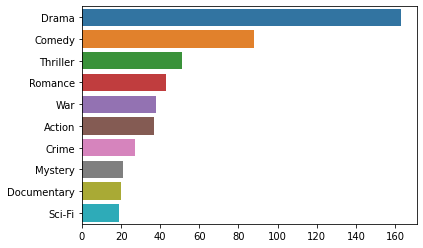

In [605]:
sns.barplot(genres_top10.values,genres_top10.index)
plt.show

### 리뷰가 50건 이상, 리뷰 평균이 4.0 이상인 영화들의 장르를 성별에 따른 분류

In [609]:
# 제목, 성별 별 영화 평점
df.groupby(['title', 'gender']).rating.mean().unstack()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [613]:
# 위에거랑 똑같은 작업
by_gender = df.pivot_table(values='rating', index = 'title', columns ='gender')
by_gender

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [616]:
#리뷰가 50건 이상인 것들
by_gender_50 = by_gender.loc[indexer1]
by_gender_50

gender,F,M
American Beauty (1999),4.238901,4.347301
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Star Wars: Episode V - The Empire Strikes Back (1980),4.106481,4.344577
Star Wars: Episode VI - Return of the Jedi (1983),3.865237,4.069058
Jurassic Park (1993),3.579407,3.814197
...,...,...
House Arrest (1996),2.583333,2.552632
Washington Square (1997),3.520000,3.160000
Love Is a Many-Splendored Thing (1955),3.555556,2.913043
"Associate, The (1996)",3.500000,2.718750


In [625]:
# 여성. 리뷰 평점 4.0인 것들
female_over4 = by_gender_50[by_gender_50['F'] >= 4.0]
female_over4
result2_1 = movies_idx.loc[female_over4.index]

In [629]:
genres = []
for x in result2_1.genres:
    genres.extend(x.split(sep='|'))
genres_top10_female = pd.value_counts(genres).head(10) # 상위 10개
genres_top10_female

Drama          189
Comedy          98
Romance         52
Thriller        43
War             35
Action          27
Mystery         23
Crime           22
Musical         19
Documentary     19
dtype: int64

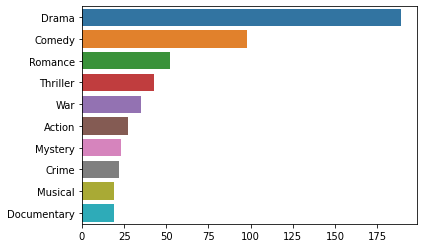

In [634]:
sns.barplot(x = genres_top10_female.values, y= genres_top10_female.index)

plt.show()

In [636]:
# 남성. 리뷰 평점 4.0인 것들
male_over4 = by_gender_50[by_gender_50['M'] >= 4.0]
print(male_over4)
result2_2 = movies_idx.loc[male_over4.index]

gender                                                     F         M
American Beauty (1999)                              4.238901  4.347301
Star Wars: Episode IV - A New Hope (1977)           4.302937  4.495307
Star Wars: Episode V - The Empire Strikes Back ...  4.106481  4.344577
Star Wars: Episode VI - Return of the Jedi (1983)   3.865237  4.069058
Saving Private Ryan (1998)                          4.114783  4.398941
...                                                      ...       ...
Maya Lin: A Strong Clear Vision (1994)              4.105263  4.100000
Conformist, The (Il Conformista) (1970)             4.285714  4.209302
World of Apu, The (Apur Sansar) (1959)              4.842105  4.189189
Four Days in September (1997)                       3.785714  4.054054
Lonely Are the Brave (1962)                         3.000000  4.162791

[323 rows x 2 columns]


In [630]:
genres = []
for x in result2_2.genres:
    genres.extend(x.split(sep='|'))
genres_top10_male = pd.value_counts(genres).head(10) # 상위 10개
genres_top10_male

Drama        160
Comedy        86
Thriller      49
Action        41
Romance       39
War           37
Crime         27
Sci-Fi        20
Adventure     19
Film-Noir     19
dtype: int64

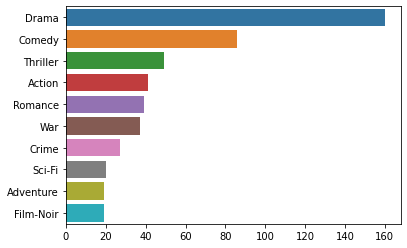

In [652]:
sns.barplot(x = genres_top10_male.values, y= genres_top10_male.index)

plt.show()

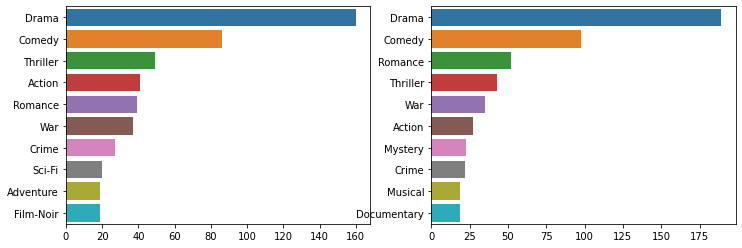

In [668]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

sns.barplot(x = genres_top10_male.values, y= genres_top10_male.index, ax= ax[0])
sns.barplot(x = genres_top10_female.values, y= genres_top10_female.index, ax= ax[1])


plt.show()

### 리뷰가 50건 이상, 리뷰 평균이 4.0 이상인 영화들의 장르를 연령대에 따른 분류

In [670]:
by_age = df.pivot_table(values='rating', index = 'title', columns='age')
by_age

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",1.000000,3.000000,3.375000,3.777778,4.000000,3.000000,NaN
Zero Effect (1998),4.125000,3.883333,3.715278,3.608696,3.764706,3.833333,3.625000
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,3.500000,NaN,NaN,NaN


In [672]:
#리뷰가 50건 이상인 것들
by_age_50 = by_age.loc[indexer1]
by_age_50

age,1,18,25,35,45,50,56
American Beauty (1999),4.434783,4.521678,4.330585,4.231156,4.151163,4.149194,4.108696
Star Wars: Episode IV - A New Hope (1977),4.267327,4.427046,4.572695,4.354633,4.386831,4.460465,4.250000
Star Wars: Episode V - The Empire Strikes Back (1980),4.184783,4.442142,4.390306,4.153846,4.137168,4.033981,4.123894
Star Wars: Episode VI - Return of the Jedi (1983),4.130000,4.182594,4.058201,3.887273,3.948357,3.786458,3.944444
Jurassic Park (1993),3.808989,3.737523,3.702000,3.795367,3.940367,3.766839,3.911504
...,...,...,...,...,...,...,...
House Arrest (1996),2.750000,2.476190,2.538462,2.571429,2.000000,4.000000,4.000000
Washington Square (1997),1.000000,3.200000,3.000000,3.500000,3.600000,3.833333,4.000000
Love Is a Many-Splendored Thing (1955),4.000000,2.500000,2.900000,3.428571,3.333333,3.428571,3.300000
"Associate, The (1996)",5.000000,2.400000,2.722222,3.500000,3.000000,3.500000,3.000000


In [678]:
# 25세. 리뷰 평점 4.0인 것들
tf_over4 = by_age[25][by_age[25] >= 4.0]
tf_over4
result3_1 = movies_idx.loc[tf_over4.index]

result3_1

,movie_id,genres
title,,
12 Angry Men (1957),1203,Drama
2001: A Space Odyssey (1968),924,Drama|Mystery|Sci-Fi|Thriller
24 7: Twenty Four Seven (1997),2444,Comedy|Drama
"39 Steps, The (1935)",965,Thriller
"400 Blows, The (Les Quatre cents coups) (1959)",2731,Drama
...,...,...
"World of Apu, The (Apur Sansar) (1959)",670,Drama
"Wrong Trousers, The (1993)",1148,Animation|Comedy
Yojimbo (1961),3030,Comedy|Drama|Western
